[Table of Contents](table_of_contents.ipynb)

# Topic 20.  Eigenvalues and Eigenvectors
Author: Mat Haskell - mhaskell9@gmail.com

##  Introduction
Eigen values and eigen vectors are very cool and show up all over the place. Eigenvalues and eigenvectors exist generally for linear operators, but this notebook will just look at matrices. The basic idea is that certain vectors exist where, after the matrix operates on them, the direction of the vector has not changed. The magnitude can be changed, but not the direction. These special vectors are eigenvectors of the operator. This makes sense when thinking about a rotation matrix. If you try to rotate a vector purely in the x-direction about the x-axis, it does not rotate. This means that the axis of rotation must be an eigenvector of the rotation matrix since it cannot change the direction of the vector it is operating on.

Another way to think about eigenvalues is that there are special cases where matrix multiplication is turned into scalar multiplication. This seems strange since the output of matrix multiplication is not really intuitive by just looking at the equation. Matrices are linear operators that can be used to accomplish various tasks. However, when multiplying a matrix by one of its eigenvectors, that vector will just be scaled by the value of the corresponding eigenvalue. The eigenvector can grow, shrink, and flip directions (i.e. eigenvalues can be negative). Eigenvalues can even be zero, in which case the eigenvector multiplied by the matrix will be scaled down to zero.

The physical meaning of eigenvalues and eigenvectors is also cool. For special symmetric matrices, like inertia tensors, stress tensors, and strain tensors, the eigenvectors are the principal axes of the matrix. So if you were to rotate the original matrix axes to line up with the eigenvectors (or principal axes), all of the cross terms would go away leaving only numbers along the main diagonal. Also, the eigenvalues are the principal stresses/strains of a stress/strain tensor. Another physical meaning comes with differential and difference equations. Eigenvalues are the poles of the system and show stability based off if the eigenvalues are positive or negative. The last example I will include here is with Google. I don't know their algorithm, but I do know that Google's search engine optimization algorithm forms a giant matrix of info regarding links between websites and they use eigenvalues and eigenvectors to determine which websites are most closely related to your search. So eigenvalues are the magic that Google uses to make sure you don't have to look past the first few links to find what you are looking for! 

$\newcommand{\real}{\mathbb{R}}$
$\newcommand{\complex}{\mathbb{C}}$
$\newcommand{\script}[1]{\mathcal{#1}}$
$\newcommand{\chi}{\script{X}}$
## Explanation of the theory
Eigenvalues only exist for square matrices.
$$A\in \complex^{n\times n}$$

Let $x\in\complex^{n\times1}$ be an eigenvector of A and $\lambda\in\complex$ be the corresponding eigenvalue of A, then the idea that matrix multiplication is turned into scalar multiplication yields the equation:
$$Ax=\lambda x$$

Here are the formal definitions for eigen pairs:

__Def:__ $(\lambda,x)$ is a __right eigen pair__ if $Ax=\lambda x$.

__Def:__ $(\lambda,x)$ is a __left eigen pair__ if $x^HA^H=\lambda x^H$.

Most of the time we deal with right eigen pairs. So here is how to actually solve for the eigenvalues. Before any computational work, we need to rearrange the equation $Ax=\lambda x$ into a useful form.

- Get everything onto 1 side of the equation (it doesn't matter which side):

$$Ax-\lambda x=0$$

- Multiply x by identity (which doesn't change it):

$$Ax-\lambda Ix=0$$

- Factor out the x:

$$(A-\lambda I)x=0$$

__Note:__ some textbooks write it as $(\lambda I-A)x=0$, but they are equivalent.

We can see that $x\in\mathcal{N}(A-\lambda I)$. Since there is a non-trivial null space we know that $(A-\lambda I)$ is not full rank, which implies that $det(A-\lambda I)=0$. We will use this fact to solve for the eigenvalues of A.

### Finding the eigenvalues of a matrix
Here are the computational steps for finding the eigenvalues of A:

1. Start with the equation we just derived:

$$det(A-\lambda I)=0$$

$$
\Rightarrow
\left|
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n}\\
a_{21} & a_{22} & \cdots & a_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{pmatrix}
-
\begin{pmatrix}
\lambda & 0 & \cdots & 0\\
0 & \lambda & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & \lambda
\end{pmatrix}
\right|
=0
$$

$$
\Rightarrow
\begin{vmatrix}
a_{11}-\lambda & a_{12} & \cdots & a_{1n}\\
a_{21} & a_{22}-\lambda & \cdots & a_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nn}-\lambda
\end{vmatrix}
=0
$$

2. Take the determinant. This will give the characteristic polynomial of A, $\chi_A(\lambda)$, and characteristic equation of A, $\chi_A(\lambda)=0$. Let $\alpha_i$ be a scalar, then the charateristic polynomial can be written as:

$$\chi_A(\lambda)\triangleq\lambda^n+\alpha_{n-1}\lambda^{n-1}+\cdots+\alpha_1\lambda+\alpha_0=0$$

3. Find the roots of the characteristic polynomial, which are the eigenvalues. By the fundamental theorem of algebra, we know that the characteristic polynomial will have n roots. This means that there are going to be n eigenvalues, although some of them may be repeated. When eigenvalues are repeated, there are p distict eigenvalues, where p counts repeated eigenvalues only once.

__Note:__ In practice, you will most likely never write an algorithm that finds eigenvalues. There are existing software tools to find eigenvalues (e.g. the eig() function in Matlab and Python). I would strongly recommend using those tools and not going through any of this process by hand! If you really wanted to find eigenvalues on paper, you could try polynomial division to get the roots. This can get tricky pretty fast as the number of roots increases (there is a lot of guessing and checking). Also, writing your own algorithm to find eigenvalues is more difficult than it might appear and you would need to do more research on your own to learn how. This is because numerical root finding algorithms typically only find real roots. Writing an algorithm to find complex roots is tricky and will not be discussed here. In fact, I believe that complex root finding tools actually use eigenvalue solvers to get the roots. Anyways, the Gershgorin Circle Theorem and Cauchy-Riemann Equations would be a good place to start your research.

__Note:__ we can write $\chi_A$ with all of the eigenvalues factored out (which would be the result of polynomial division):

$$\chi_A(\lambda)=(\lambda-\lambda_{1})(\lambda-\lambda_{2})\cdots(\lambda-\lambda_{n})=\Pi_{i=0}^n(\lambda-\lambda_i)$$

__Def:__ Algebraic multiplicity, $m_i$, of $\lambda_i$ is the number of times it is repeated. So $\chi_A$ can be written like this:
$$\chi_A(\lambda)=(\lambda-\lambda_{1})^{m_1}(\lambda-\lambda_{2})^{m_2}\cdots(\lambda-\lambda_{p})^{m_p},\ \ \ \ \ p\leq n$$

### Finding the eigenvectors of a matrix
After finding the roots/eigenvalues, we can solve for the eigenvectors by plugging in each eigenvalue into the equation $(A-\lambda_iI)x=0$. You are just solving for the null space of $(A-\lambda I)$. 

__Note:__ any linear combination of vectors from $\mathcal{N}(A-\lambda I)$ are also eigenvectors. Because any scalar multiple of an eigenvector is also an eigenvector, most software libraries will return the eigenvectors with a norm of 1.

### Example:
Find the eigenvalues and eigenvectors of A by following the steps above.
$$A=\begin{pmatrix}4 & -2\\5 & -7\end{pmatrix}$$

1. First set $det(A-\lambda I)=0$:

$$
\begin{vmatrix}
4-\lambda & -2\\
5 & -7-\lambda
\end{vmatrix}
=0
$$

2. Take the determinant to find the characteristic equation:

\begin{eqnarray}
\chi_A(\lambda)&=&(4-\lambda)(-7-\lambda)+10=0\\
&=&\lambda^2+3\lambda-18=0
\end{eqnarray}

3. Find the roots/eigenvalues.

$$\chi_A(\lambda)=(\lambda+6)(\lambda-3)$$

The order of assigning $\lambda_1$ and $\lambda_2$ doesn't really matter. I will use these:
$$\lambda_1=3$$ 
$$\lambda_2=-6$$

Neither of these are repeated, so the algebraic multiplicity of both are just 1.
$$m_1=1$$ 
$$m_2=1$$

Let's continue with the example and find the eigenvectors of A.
- For $\lambda_1=3$:

\begin{eqnarray}
\begin{pmatrix}
4-\lambda & -2\\
5 & -7-\lambda
\end{pmatrix}
\begin{pmatrix}x_1\\x_2\end{pmatrix}&=&\begin{pmatrix}0\\0\end{pmatrix} \\
\begin{pmatrix}
4-3 & -2\\
5 & -7-3
\end{pmatrix}
\begin{pmatrix}x_1\\x_2\end{pmatrix}&=&\begin{pmatrix}0\\0\end{pmatrix} \\
\begin{pmatrix}
1 & -2\\
5 & -10
\end{pmatrix}
\begin{pmatrix}x_1\\x_2\end{pmatrix}&=&\begin{pmatrix}0\\0\end{pmatrix}
\end{eqnarray}

Notice that both rows of A when multiplied by x give the same equation:
\begin{eqnarray}
&x_1&-2x_2=0 \\
\Rightarrow &x_1&=2x_2
\end{eqnarray}
Now we can solve for x:
$$
x=
\begin{pmatrix}2x_2 \\ x_2\end{pmatrix}=
\begin{pmatrix}2 \\ 1\end{pmatrix}x_2
$$
An eigenvector associated with $\lambda_1$, $\mathbf{v_1}$, is any scalar multiple of $\begin{pmatrix}2 \\ 1\end{pmatrix}$.

- For $\lambda_2=-6$:

\begin{eqnarray}
\begin{pmatrix}
4-\lambda & -2\\
5 & -7-\lambda
\end{pmatrix}
\begin{pmatrix}x_1\\x_2\end{pmatrix}&=&\begin{pmatrix}0\\0\end{pmatrix} \\
\begin{pmatrix}
4+6 & -2\\
5 & -7+6
\end{pmatrix}
\begin{pmatrix}x_1\\x_2\end{pmatrix}&=&\begin{pmatrix}0\\0\end{pmatrix} \\
\begin{pmatrix}
10 & -2\\
5 & -1
\end{pmatrix}
\begin{pmatrix}x_1\\x_2\end{pmatrix}&=&\begin{pmatrix}0\\0\end{pmatrix}
\end{eqnarray}

Notice that both rows of A when multiplied by x give the same equation:
\begin{eqnarray}
&5x_1&-x_2=0 \\
\Rightarrow &x_2&=5x_1
\end{eqnarray}
Now we can solve for x:
$$
x=
\begin{pmatrix}x_1 \\ 5x_1\end{pmatrix}=
\begin{pmatrix}1 \\ 5\end{pmatrix}x_1
$$
An eigenvector associated with $\lambda_2$, $\mathbf{v_2}$, is any scalar multiple of $\begin{pmatrix}1 \\ 5\end{pmatrix}$.

### Eigenvalue decomposition
The eigenvalue decomposition of A is as such:
$$A=S\Lambda S^{-1}$$

Where,
$$
\Lambda=diag([\lambda_1, \lambda_2, \cdots, \lambda_n])
=
\begin{pmatrix}
\lambda_1 & 0 & \cdots & 0 \\
0 & \lambda_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & 0 \\
0 & 0 & \cdots & \lambda_n
\end{pmatrix}
$$

$$
S=\begin{pmatrix}
\mathbf{v_1} & \mathbf{v_2} & \cdots & \mathbf{v_n}
\end{pmatrix}
$$

__Note:__ it does not matter in which order the eigenvalues are placed to form $\Lambda$. However, for $A=S\Lambda S^{-1}$ to be true, the position of the column of $\lambda_i$ must match the position of the column of $\mathbf{v_i}$ (where $\mathbf{v_i}$ is an eigenvector corresponding to $\lambda_i$).

__Def:__ Geometric multiplicity, $q_i$, of $\lambda_i$ is the number of linearly independent eigenvectors that can be formed from $\lambda_i$. Also, $1\leq q_i\leq m_i$.
This means at least 1 eigenvector can be formed from every eigenvalue, but at most $m_i$. For example: if an eigenvalue is repeated 3 times, there will be at most 3 corresponding linearly independent eigenvectors but at least 1 eigenvector.

The geometric multiplicity of an eigenvalue is a very important concept for eigenvalue decomposition. In order to perform the eigenvalue decomposition, as described above where $A=S\Lambda S^{-1}$, the geomectric multiplicity must be equal to the algebraic multiplicity for each eigenvalue. i.e.

$$m_i=q_i\ \ \ \forall\lambda_i$$

This means that however many times an eigenvalue is repeated, there must be that same number of linearly independent eigenvectors derived from that eigenvalue. Otherwise, there isn't enough eigenvectors to fill the columns of S.

When $m_i\neq q_i$, there is a process to find what are called generalized eigenvectors to fill up the missing columns of S. When this happens, $\Lambda$ is replaced with $J$ and is not strictly diagonal. This is called the Jordan form and is a topic for another day.

### Fun Facts 
- If an eigenvalue is complex, its complex conjugate will also be an eigenvalue. 
- If an eigenvector is complex, its complex conjugate will also be an eigenvector.
- Symmetric matrices have real eigenvalues.
- For a positive definite matrix $\Leftrightarrow$ all eigenvalues will be positive ($\lambda_i>0$).
- For a positive semi-definite matrix $\Leftrightarrow$ all eigenvalues will be non-negative ($\lambda_i\geq0$).
- For a negative semi-definite matrix $\Leftrightarrow$ all eigenvalues will be non-positive ($\lambda_i\leq0$).
- For a negative definite matrix $\Leftrightarrow$ all eigenvalues will be negative ($\lambda_i<0$).
- The trace of a matrix equals the sum of its eigenvalues ($trace(A)=\sum\lambda_i$).
- The determinant of a matrix equals the product of its eigenvalues ($det(A)=\Pi\lambda_i$).
- Eigenvectors of a matrix are all linearly independent.
- The eigenvalues of a diagonal matrix are all of the elements along the diagonal.
- For every 0 eigenvalue, the rank of a matrix goes down by 1.

## Simple Numerical Examples

### Setup structure for testing

In [101]:
import numpy as np

class Test:
    def __init__(self):
        self.i = 1
    def runTest(self,check,statement):
        print('Test %d: ' % self.i)
        self.i += 1
        if check:
            print(statement + ' \n')
        else:
            print('error \n')
            
def printEigen(vals,vecs):
    print('Eigenvalues are {:.2f}, {:.2f}, and {:.2f}. \n'.format(vals[0],vals[1],vals[2]))
    print('The eigenvector corresponding to {:.2f} is:'.format(vals[0]))
    print(vecs[:,0][:,None])
    print('The eigenvector corresponding to {:.2f} is:'.format(vals[1]))
    print(vecs[:,1][:,None])
    print('The eigenvector corresponding to {:.2f} is:'.format(vals[2]))
    print(vecs[:,2][:,None])
    print('') # add a blank line at the end

### Verify the example from above.

In [102]:
# this is the matrix we used above
A = np.array([[4,-2],
              [5,-7]])
# these are the eigenvalues we found
l1 = 3
l2 = -6
# these are the eigenvectors we found
v1 = np.array([[2],
               [1]])
v2 = np.array([[1],
               [5]])

# check that Ax-lx=0
# note that numerical precision might limit this to being very close to true
tests = Test()

test1 = np.array_equal(A@v1, l1*v1)
tests.runTest(test1,'v1 and l1 are a right eigen pair!')

test2 = np.array_equal(A@v2, l2*v2)
tests.runTest(test2,'v2 and l2 are a right eigen pair!')
    
# eigenvalue decomposition
L = np.diag([l1, l2])
S = np.concatenate((v1,v2), axis=1)
S_inv = np.linalg.inv(S)

# test that it works
test3 = np.array_equal(A, S@L@S_inv)
tests.runTest(test3,'A = S*L*S_inv!')

# now let's test that the order doesn't matter
L = np.diag([l2, l1])
S = np.concatenate((v2,v1), axis=1)
S_inv = np.linalg.inv(S)

test4 = np.array_equal(A, S@L@S_inv)
tests.runTest(test4,'It still works when the order is switched!')

# test that trace equals sum of eigenvalues
test5 = np.trace(A)==l1+l2
tests.runTest(test5,'The trace equals sum of eigenvalues!')

# test that determinant equals product of eigenvalues
test6 = np.linalg.det(A)==l1*l2
tests.runTest(test6,'The determinant equals product of eigenvalues!')
# this runs into numerical precision errors, try again testing if error is small
det_error = np.linalg.det(A)-l1*l2
test7 = np.abs(det_error) < 1e-10
tests.runTest(test7,'The determinant equals product of eigenvalues!')

Test 1: 
v1 and l1 are a right eigen pair! 

Test 2: 
v2 and l2 are a right eigen pair! 

Test 3: 
A = S*L*S_inv! 

Test 4: 
It still works when the order is switched! 

Test 5: 
The trace equals sum of eigenvalues! 

Test 6: 
error 

Test 7: 
The determinant equals product of eigenvalues! 



### Now let's see how to get the eigenvalues through code

In [103]:
A = np.array([[2,0,0],
              [0,1,-2],
              [0,1,3]])

vals,vecs = np.linalg.eig(A)

printEigen(vals,vecs)

# check if Ax-lx=0
# due to numerical precision error, I will check if norm(Ax-lx) < 1e-10
tests = Test()

test1 = np.linalg.norm(A@vecs[:,0] - vals[0]*vecs[:,0]) < 1e-10
tests.runTest(test1,'A*x1 = l1*x1!')

test2 = np.linalg.norm(A@vecs[:,1] - vals[1]*vecs[:,1]) < 1e-10
tests.runTest(test2,'A*x2 = l2*x2!')

test3 = np.linalg.norm(A@vecs[:,2] - vals[2]*vecs[:,2]) < 1e-10
tests.runTest(test3,'A*x3 = l3*x3!')


# Eigenvalue decomposition
S = vecs
Lambda = np.diag([vals[0],vals[1],vals[2]])
S_inv = np.linalg.inv(S)

# test that A = S*Lambda*S_inv
test4 = np.linalg.norm(A - S@Lambda@S_inv) < 1e-10
tests.runTest(test4,'Eigenvalue decomposition worked!')

# test if eigenvalues came in complex conjugate pairs
test5 = vals[0].conj()==vals[1]
tests.runTest(test5,'Eigenvalues came in complex conjugate pairs!')

# test if eigenvectors came in complex conjugate pairs
test6 = np.array_equal(vecs[:,0].conj(), vecs[:,1])
tests.runTest(test6,'Eigenvectors came in complex conjugate pairs!')

Eigenvalues are 2.00+1.00j, 2.00-1.00j, and 2.00+0.00j. 

The eigenvector corresponding to 2.00+1.00j is:
[[ 0.        +0.j        ]
 [ 0.81649658+0.j        ]
 [-0.40824829-0.40824829j]]
The eigenvector corresponding to 2.00-1.00j is:
[[ 0.        -0.j        ]
 [ 0.81649658-0.j        ]
 [-0.40824829+0.40824829j]]
The eigenvector corresponding to 2.00+0.00j is:
[[1.+0.j]
 [0.+0.j]
 [0.+0.j]]

Test 1: 
A*x1 = l1*x1! 

Test 2: 
A*x2 = l2*x2! 

Test 3: 
A*x3 = l3*x3! 

Test 4: 
Eigenvalue decomposition worked! 

Test 5: 
Eigenvalues came in complex conjugate pairs! 

Test 6: 
Eigenvectors came in complex conjugate pairs! 



In [99]:
B = np.array([[1,3,4],
              [1,3,4],
              [1,3,4]])

vals,vecs = np.linalg.eig(B)

# test that rank goes down by 1 for each 0 eigenvalue
num_0_vals = 0
for x in vals:
    if x==0:
        num_0_vals += 1

m,n = B.shape      
max_rank = min(m,n)
expected_rank = max_rank - num_0_vals

tests = Test()

test1 = expected_rank==np.linalg.matrix_rank(B)
tests.runTest(test1,'The rank went down by 1 for each 0 eigenvalue!')

# show that repeated eigenvalues don't always produce lin. ind. eigenvectors
test2 = np.array_equal(vecs[:,0], -vecs[:,2]) and vals[0]==vals[2]
tests.runTest(test2,'Repeated eigenvalues did not produce linearly independent eigenvectors')

Test 1: 
The rank went down by 1 for each 0 eigenvalue! 

Test 2: 
Repeated eigenvalues did not produce linearly independent eigenvectors 



## Applications
### Find the axis and angle of rotation from a rotation matrix
It turns out that the eigenvalues of a 3 dimensional rotation matrix will always be 1, $e^{j\theta}$, and $e^{-j\theta}$. Also, the eigenvector associated with $\lambda=1$ is the axis of rotation. You could also find these values through other means, like quaternions or axis-angle parameterization. But it is cool that the eigenvalues and eigenvectors have real physical meaning for rotation matrices!

__Note:__ $e^{j\theta}=cos(\theta)+j sin(\theta)$, so you find the magnitude of theta with $acos(real(\lambda))$. There are limitations of acos() and asin() that should be considered as well. I will use positve angles below 90 degrees to avoid issues here.

In [3]:
def rotx(angle):
    R = np.array([[1,0,0],
                  [0,np.cos(angle),-np.sin(angle)],
                  [0,np.sin(angle),np.cos(angle)]])
    return R
def roty(angle):
    R = np.array([[np.cos(angle),0,np.sin(angle)],
                  [0,1,0],
                  [-np.sin(angle),0,np.cos(angle)]])
    return R
def rotz(angle):
    R = np.array([[np.cos(angle),-np.sin(angle),0],
                  [np.sin(angle),np.cos(angle),0],
                  [0,0,1]])
    return R

tests = Test()

# test simple rotation about x-axis
theta_x = np.pi/4
Rx = rotx(theta_x)
x_axis = np.array([[1],[0],[0]])

vals,vecs = np.linalg.eig(Rx)

# check to see if axis of rotation from eigenvector is the x-axis
printEigen(vals,vecs)
index = np.where(vals==1)[0]
axis_of_rotation = vecs[:,index[0]][:,None]

test1 = np.array_equal(x_axis,axis_of_rotation)
tests.runTest(test1,'The eigenvector associated with lambda=1 is the axis of rotation!')

# check that the amount of rotation from eigenvalue is correct
angle = np.arccos(np.real(vals[0]))

test2 = angle==theta_x
tests.runTest(test2,'The eigenvalue gave the correct amount of rotation!')

NameError: name 'Test' is not defined

In [4]:
# Now test a case where there is rotation about all 3 axes
theta_y = np.pi/6
theta_z = np.pi/5
Ry = roty(theta_y)
Rz = rotz(theta_z)
R = Rx@Ry@Rz

vals,vecs = np.linalg.eig(R)

# get the axis-angle parameterization
expected_angle = np.arccos(0.5*(np.trace(R)-1))
expected_axis = np.array([[R[1,2]-R[2,1]],
                         [R[2,0]-R[0,2]],
                         [R[0,1]-R[1,0]]])/(2*np.sin(expected_angle))

# check to see if axis of rotation from eigenvector is correct
printEigen(vals,vecs)
eigen_axis = vecs[:,0]

test3 = np.array_equal(expected_axis, eigen_axis)
tests.runTest(test1,'The eigenvector associated with lambda=1 is the axis of rotation!')

# check that the amount of rotation from eigenvalue is correct
eigen_angle = np.arccos(np.real(vals[2]))

test4 = expected_angle==eigen_angle
tests.runTest(test2,'The eigenvalue gave the correct amount of rotation!')

NameError: name 'np' is not defined

### Power Iteration
by Curtis Johnson

Power iteration is a useful algorithm used for optimal control, path planning, and notably early versions of Google's PageRank algorithm.

The useful recursive relationship used in this algorithm is given by $b_{k+1} = \frac{Ab_k}{||Ab_k||}$.

#### Lemma:

$b_k$ will converge to a multiple of the eigenvector cooresponding to the largest eigenvalue.

#### Proof:

Let A be diagonalizable nxn matrix with eigenvalues $\lambda_1, \lambda_2,\cdots,\lambda_m$ such that $\lambda_1$ is the dominant eigenvalue (i.e. $|\lambda_1| > |\lambda_i|, \forall i > 1$). The cooresponding eigenvectors are $x_1, x_2,\cdots, x_m$.

Also let the initial vector $b_0 \in span(x_1\cdots x_p)$ such that $b_0 = c_1x_1 + c_2x_2 +\cdots+ c_nx_n$ where $c_1 \neq 0$.

$$\begin{align}
\implies A^kb_0 &= c_1A^kx_1 + c_2A^kx_2 +\cdots+ c_nA^kx_n \\
&= c_1\lambda_1^kx_1 + c_2\lambda_2^kx_2 +\cdots+ c_n\lambda_n^kx_n \\
&= c_1\lambda_1^k \left[x_1 + \frac{c_2}{c_1}\left(\frac{\lambda_2}{\lambda_1}\right)^k x_2 + \cdots + \frac{c_n}{c_1}\left(\frac{\lambda_n}{\lambda_1}\right)^k x_n\right] \\
&= c_1 \lambda_1^k x_1, k \rightarrow \infty \\
&= \alpha x_1
\end{align}$$

Eigenvalues
 [-3.10977223  6.10977223]
Eigenvectors
 [[-0.58959436 -0.50629921]
 [ 0.80769951 -0.86235788]]


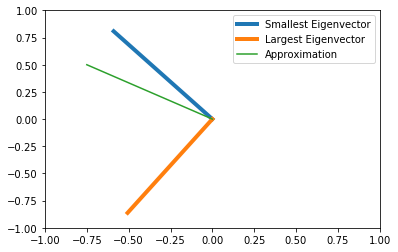

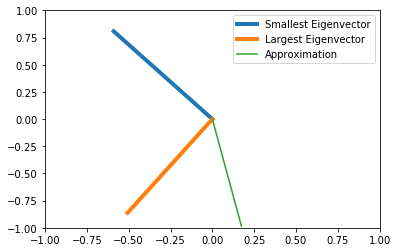

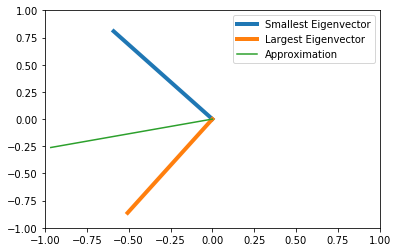

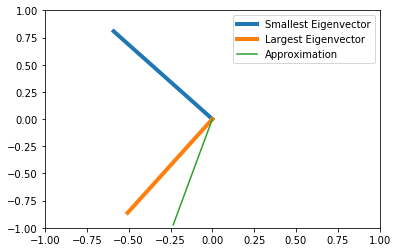

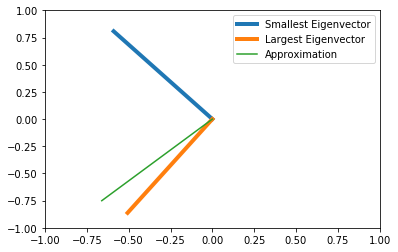

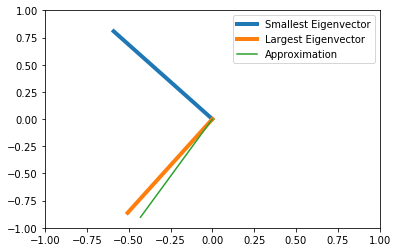

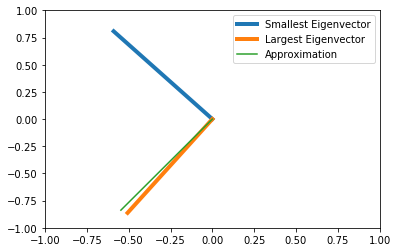

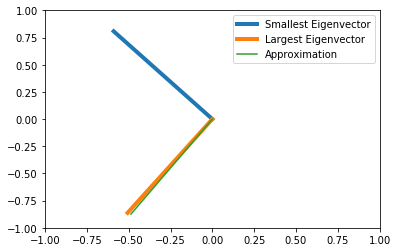

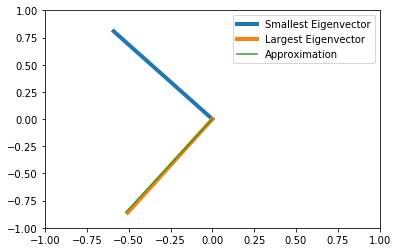

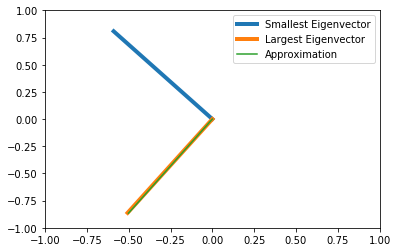

In [32]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1,3],[7,2]])
b = np.array([-.75,0.5]) #starting choice of this vector is totally arbitrary

eigvals, eigvecs = np.linalg.eig(A)

print("Eigenvalues\n", eigvals)
print("Eigenvectors\n", eigvecs)

largest_eigval_ind = np.argmax(np.abs(eigvals))
largest_eigvec = eigvecs[:,largest_eigval_ind]

smallest_eigval_ind = np.argmin(np.abs(eigvals))
smallest_eigvec = eigvecs[:,smallest_eigval_ind]

plt.figure()
plt.xlim(-1,1)
plt.ylim(-1,1)

for i in range(0,10):
    plt.clf()
    plt.plot([0,smallest_eigvec[0]], [0, smallest_eigvec[1]], linewidth=4)
    plt.plot([0,largest_eigvec[0]], [0, largest_eigvec[1]], linewidth=4)
    plt.plot([0,b[0]], [0, b[1]])
    plt.legend(['Smallest Eigenvector','Largest Eigenvector', 'Approximation'])
    plt.xlim(-1,1)
    plt.ylim(-1,1)

    b = A@b
    b = b/np.linalg.norm(b)
    
    plt.pause(1.0)

## Homework Problem - The Trillion Dollar Eigenvector
by Curtis Johnson

Let the diagram below represent the entire internet where each circle represents a webpage. Outgoing arrows represent links to external websites and incoming arrows represent websites that link to your website (e.g. an example to illustrate).

PUT DIAGRAM HERE.

Each website's relative importance can be written as a function of how many websites link to it (e.g. if website A is linked to by website B and website C, the relative importance of website A ($x_A$) can be written as $x_A = x_B + x_C$). 

You want to rank all of these websites by their relative importance in order to place ads where they are most likely to be seen (i.e. place ads in the most important websites). 

a) Find the probability matrix $P$ (also known as a [left stochastic matrix](https://en.wikipedia.org/wiki/Stochastic_matrix)) that describes the probability from moving from each webpage to any other webpage. NOTE: Because this matrix contains probabilities, make sure that each column sum is equal to 1. Row sums do not need to be 1.

b) Show that the real part of the eigenvalues of $P$ will always be <= 1.

c) Find the probability vector $\boldsymbol{x} = [x_A, x_B, x_C, x_D]^T$ that ranks each of the webpages in the internet by their relative importance. HINT: This is an eigenvector problem.

d) This problem can also be solved iteratively in cases where computing the eigenvalues/eigenvectors is computationally prohibitive. Somehow explain about matrices projecting data onto the largest eigenvector with power iteration. Proof that this converges to largest eigenvalue (uses jordan form in proof). Proof of power iteration.